In [ ]:
# 1. inverted index construction
# 2. positional inverted index
# 3. preprocessing /tokenisation
# 4. Hashing
# 5. permtum index
# 6. Bigram index
# 7. soundex
# 8. Jaacard similarity
# 9. N gram
# 10. bsbi
# 11. spimi
# 12. porters algo
# 13. tfidf

In [7]:
import pandas as pd

In [13]:
df = pd.read_csv('ms_marco_train.csv')
df.head()

,query,query_id,query_type,first_answer,passage_text
0,what is rba,19699,description,Results-Based Accountability is a disciplined ...,Results-Based Accountability® (also known as R...
1,was ronald reagan a democrat,19700,description,Yes,"From Wikipedia, the free encyclopedia. A Reaga..."
2,how long do you need for sydney and surroundin...,19701,numeric,20-25 minutes,Sydney is the capital city of the Australian s...
3,price to install tile in shower,19702,numeric,$11 to $22 per square foot,1 Install ceramic tile floor to match shower-A...
4,why conversion observed in body,19703,description,Due to symptoms in the body,Conversion disorder is a type of somatoform di...


In [14]:
# Only considering the first 1000 rows for now
df = df.head(1000)


In [18]:
# Consider only the query column
data = df['query'].tolist()
print(data)

['what is rba', 'was ronald reagan a democrat', 'how long do you need for sydney and surrounding areas', 'price to install tile in shower', 'why conversion observed in body', 'where are the lungs located in the back', 'cost to get a patent', 'what does a metabolic acidosis need to reverse the condition', 'best tragedies of ancient greece', 'what is a conifer', 'in animals somatic cells are produced by and gametic cells are produced by', 'remembering the name of the author who wrote the cat in the hat', 'how long cooking chicken legs in the big easy', 'average cost of heating per square foot', 'is mount pinatubo made of granite or basalt', 'concrete pads cost', 'what kind of organism is a black damsel', 'who coined the phrase it is what it is', 'what is oilskin fabric', 'how long is german measles contagious', 'what is a camerata', 'how long does it take to bake a pound cake', 'what is the maximum dose of subutex', 'salary difference in same team', 'what was tet', 'describe the pathway 

In [16]:
# 1. Inverted Index Construction
# inverted index
# skip special char 
# stopwords present
from collections import defaultdict
from nltk.tokenize import WordPunctTokenizer

# Initialize WordPunctTokenizer
tokenizer = WordPunctTokenizer()

# Function to tokenize and preprocess a document
def preprocess(text): 
    text = text.lower()  # Convert to lowercase
    tokens = tokenizer.tokenize(text)  # Use NLTK WordPunctTokenizer to tokenize
    return set(tokens)  # Use a set to remove duplicate tokens

# Initialize the inverted index
inverted_index = defaultdict(set)

# Create the inverted index
for doc_id, doc_text in enumerate(data, start=1):  # Enumerate to get a document ID starting from 1
    terms = preprocess(doc_text)  # Preprocess the document text
    for term in terms: 
        if term.isalpha():
            inverted_index[term].add(doc_id)  # Add the document ID to the set for each term

# Sort the inverted index by term and sort the document IDs for each term
sorted_inverted_index = {term: sorted(doc_ids) for term, doc_ids in sorted(inverted_index.items())}

# Display the sorted inverted index
print("Sorted Inverted Index:")
for term, doc_ids in sorted_inverted_index.items():
    print(f"{term} -> {doc_ids}")


Sorted Inverted Index:
a -> [2, 7, 8, 10, 17, 21, 22, 26, 30, 31, 34, 37, 38, 43, 53, 56, 57, 64, 68, 69, 70, 72, 75, 76, 79, 80, 82, 92, 97, 98, 106, 107, 108, 110, 117, 118, 120, 130, 136, 138, 142, 144, 151, 153, 160, 172, 173, 174, 182, 183, 192, 193, 201, 203, 204, 220, 223, 225, 234, 236, 240, 254, 259, 263, 265, 266, 267, 277, 279, 285, 300, 303, 306, 309, 324, 357, 358, 360, 366, 372, 383, 384, 387, 390, 403, 411, 416, 420, 439, 441, 447, 448, 463, 465, 470, 473, 483, 484, 485, 493, 496, 500, 503, 510, 518, 521, 523, 528, 529, 541, 549, 555, 557, 560, 569, 578, 586, 587, 588, 596, 598, 623, 630, 637, 650, 654, 687, 696, 703, 704, 705, 706, 719, 722, 724, 726, 727, 740, 742, 751, 752, 755, 759, 768, 770, 771, 772, 777, 778, 802, 805, 809, 820, 823, 825, 840, 850, 854, 855, 859, 862, 863, 869, 881, 883, 885, 890, 899, 900, 906, 924, 926, 947, 950, 952, 955, 964, 965, 986, 993, 994]
abbreviation -> [188]
about -> [107]
above -> [439]
abundant -> [601]
accent -> [75]
access -> [178

In [17]:
# 2. Positional Inverted Index Construction 
# Positional inverted index means that we store the positions of each term in each document.
from collections import defaultdict
from nltk.tokenize import WordPunctTokenizer

# Initialize WordPunctTokenizer
tokenizer = WordPunctTokenizer()

# Function to tokenize and preprocess a document

def preprocess(text):
    text = text.lower()  # Convert to lowercase
    tokens = tokenizer.tokenize(text)  # Use NLTK WordPunctTokenizer to tokenize
    return tokens  # Return the list of tokens

# Initialize the positional inverted index
positional_inverted_index = defaultdict(lambda: defaultdict(list))

# Create the positional inverted index
for doc_id, doc_text in enumerate(data, start=1):  # Enumerate to get a document ID starting from 1
    terms = preprocess(doc_text)  # Preprocess the document text
    for position, term in enumerate(terms, start=1):  # Enumerate to get the position starting from 1
        if term.isalpha():
            positional_inverted_index[term][doc_id].append(position)  # Add the position to the list for each term and document ID

# Sort the positional inverted index by term and sort the document IDs and positions for each term
sorted_positional_inverted_index = {term: {doc_id: positions for doc_id, positions in sorted(doc.items())} for term, doc in sorted(positional_inverted_index.items())}

# Display the sorted positional inverted index
print("Sorted Positional Inverted Index:")
for term, doc_positions in sorted_positional_inverted_index.items():
    print(f"{term} -> {doc_positions}")



Sorted Positional Inverted Index:
a -> {2: [4], 7: [4], 8: [3], 10: [3], 17: [6], 21: [3], 22: [8], 26: [5, 9], 30: [3], 31: [9], 34: [3], 37: [3], 38: [6], 43: [4], 53: [6, 9], 56: [3], 57: [4], 64: [11], 68: [4], 69: [3], 70: [4], 72: [3], 75: [3], 76: [4], 79: [6], 80: [4], 82: [6], 92: [6], 97: [3], 98: [12], 106: [3], 107: [5], 108: [7, 12], 110: [3], 117: [3], 118: [4], 120: [4], 130: [4], 136: [3], 138: [7], 142: [4], 144: [4], 151: [9], 153: [4], 160: [4], 172: [10], 173: [4], 174: [6], 182: [4], 183: [5, 8], 192: [5], 193: [6], 201: [3], 203: [3], 204: [4], 220: [12], 223: [3], 225: [4, 8], 234: [6], 236: [2], 240: [3], 254: [4], 259: [9], 263: [6], 265: [4], 266: [4], 267: [5], 277: [5], 279: [3], 285: [3], 300: [4], 303: [4], 306: [8], 309: [3], 324: [3], 357: [4], 358: [5], 360: [7], 366: [6], 372: [3], 383: [4], 384: [4], 387: [3], 390: [3], 403: [3], 411: [3], 416: [10], 420: [4], 439: [3], 441: [8], 447: [4], 448: [3], 463: [4], 465: [3], 470: [5], 473: [4], 483: [4], 48

In [19]:
# 3. preprocessing /tokenisation
# Preprocessing involves tokenization, stopword removal, stemming, and lowercasing.
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer

# Initialize WordPunctTokenizer
tokenizer = WordPunctTokenizer()

# Initialize PorterStemmer
stemmer = PorterStemmer()

# Get the list of English stopwords
stopwords_list = set(stopwords.words('english'))

# Function to preprocess a document
def preprocess(text):
    text = text.lower()  # Convert to lowercase
    tokens = tokenizer.tokenize(text)  # Use NLTK WordPunctTokenizer to tokenize
    tokens = [token for token in tokens if token.isalpha()]  # Remove tokens that are not alphabetic
    tokens = [token for token in tokens if token not in stopwords_list]  # Remove stopwords
    tokens = [stemmer.stem(token) for token in tokens]  # Apply stemming
    return tokens  # Return the list of preprocessed

# Preprocess the list data 
preprocessed_data = [preprocess(doc_text) for doc_text in data]

# Display the preprocessed data
print("Preprocessed Data:")
for doc_id, terms in enumerate(preprocessed_data, start=1):
    print(f"Doc {doc_id}: {terms}")
    

Preprocessed Data:
Doc 1: ['rba']
Doc 2: ['ronald', 'reagan', 'democrat']
Doc 3: ['long', 'need', 'sydney', 'surround', 'area']
Doc 4: ['price', 'instal', 'tile', 'shower']
Doc 5: ['convers', 'observ', 'bodi']
Doc 6: ['lung', 'locat', 'back']
Doc 7: ['cost', 'get', 'patent']
Doc 8: ['metabol', 'acidosi', 'need', 'revers', 'condit']
Doc 9: ['best', 'tragedi', 'ancient', 'greec']
Doc 10: ['conif']
Doc 11: ['anim', 'somat', 'cell', 'produc', 'gamet', 'cell', 'produc']
Doc 12: ['rememb', 'name', 'author', 'wrote', 'cat', 'hat']
Doc 13: ['long', 'cook', 'chicken', 'leg', 'big', 'easi']
Doc 14: ['averag', 'cost', 'heat', 'per', 'squar', 'foot']
Doc 15: ['mount', 'pinatubo', 'made', 'granit', 'basalt']
Doc 16: ['concret', 'pad', 'cost']
Doc 17: ['kind', 'organ', 'black', 'damsel']
Doc 18: ['coin', 'phrase']
Doc 19: ['oilskin', 'fabric']
Doc 20: ['long', 'german', 'measl', 'contagi']
Doc 21: ['camerata']
Doc 22: ['long', 'take', 'bake', 'pound', 'cake']
Doc 23: ['maximum', 'dose', 'subutex']
D

In [20]:
# 4. Hashing
# storing data in hash table 
# hash table creation for storing data

# code 
# Hash Table Creation
# A hash table is a data structure that stores key-value pairs.
# The key is used to compute an index in the hash table, where the value is stored.

# Initialize the hash table
hash_table = {}

# Function to compute the hash value of a key
def hash_function(key):
    return hash(key) % 10  # Use the built-in hash function to compute the hash value

# Function to insert a key-value pair into the hash table
def insert(hash_table, key, value):
    index = hash_function(key)  # Compute the hash value of the key
    if index not in hash_table:
        hash_table[index] = {}  # Initialize an empty dictionary if the index is not in the hash table
    hash_table[index][key] = value  # Insert the key-value pair into the hash table


# Insert the preprocessed data into the hash table
for doc_id, terms in enumerate(preprocessed_data, start=1):
    for term in terms:
        insert(hash_table, term, doc_id)  # Insert the term and document ID into the hash table

# Display the hash table
print("Hash Table:")
for index, key_values in hash_table.items():
    print(f"Index {index}: {key_values}")


Hash Table:
Index 5: {'rba': 1, 'reagan': 2, 'convers': 5, 'somat': 11, 'name': 949, 'hat': 12, 'oilskin': 19, 'measl': 848, 'subutex': 23, 'energi': 973, 'ga': 285, 'medicar': 62, 'madison': 35, 'phone': 404, 'residenti': 39, 'type': 992, 'interior': 552, 'certifi': 899, 'game': 772, 'biolog': 720, 'griffo': 54, 'go': 878, 'alon': 57, 'particip': 62, 'carriageway': 64, 'expert': 65, 'exampl': 840, 'muscl': 907, 'brain': 619, 'leav': 1000, 'meal': 603, 'torranc': 87, 'fahrenheit': 91, 'watchdog': 96, 'sy': 96, 'file': 565, 'worth': 710, 'desegreg': 109, 'movement': 343, 'picker': 121, 'complex': 124, 'zoster': 126, 'time': 846, 'invest': 799, 'height': 300, 'angora': 131, 'fall': 509, 'narcot': 371, 'cup': 137, 'test': 815, 'frustul': 141, 'phytoplankton': 141, 'cocoa': 147, 'chang': 876, 'normal': 914, 'itchi': 161, 'play': 166, 'utah': 167, 'oil': 894, 'theori': 185, 'sc': 193, 'squa': 201, 'northern': 202, 'soulshin': 207, 'tilt': 211, 'year': 733, 'work': 925, 'tsh': 218, 'uma': 22

In [25]:
# 5. Permuterm Index
# A permuterm index is a data structure that allows for efficient wildcard search queries.
# It is created by appending a special symbol ($) to the end of each term and generating all rotations of the term.
# The permuterm index stores the rotated terms and their original terms.

# Initialize the permuterm index
permuterm_index = {}

# Function to generate permuterms for a term
def generate_permuterms(term):
    term = term + '$'  # Append the special symbol '$' to the end of the term
    rotations = [term[i:] + term[:i] for i in range(len(term))]  # Generate all rotations of the term
    return rotations  # Return the list of rotations

# Create the permuterm index
for term in sorted(inverted_index.keys()):  # Iterate over the terms in the inverted index
    rotations = generate_permuterms(term)  # Generate permuterms for the term
    for rotation in rotations:
        permuterm_index[rotation] = term  # Add the rotation and the original term to the permuterm index

# Display the permuterm index
print("Permuterm Index:")
for rotation, term in permuterm_index.items():
    print(f"{rotation} -> {term}")


Permuterm Index:
a$ -> a
$a -> a
abbreviation$ -> abbreviation
bbreviation$a -> abbreviation
breviation$ab -> abbreviation
reviation$abb -> abbreviation
eviation$abbr -> abbreviation
viation$abbre -> abbreviation
iation$abbrev -> abbreviation
ation$abbrevi -> abbreviation
tion$abbrevia -> abbreviation
ion$abbreviat -> abbreviation
on$abbreviati -> abbreviation
n$abbreviatio -> abbreviation
$abbreviation -> abbreviation
about$ -> about
bout$a -> about
out$ab -> about
ut$abo -> about
t$abou -> about
$about -> about
above$ -> above
bove$a -> above
ove$ab -> above
ve$abo -> above
e$abov -> above
$above -> above
abundant$ -> abundant
bundant$a -> abundant
undant$ab -> abundant
ndant$abu -> abundant
dant$abun -> abundant
ant$abund -> abundant
nt$abunda -> abundant
t$abundan -> abundant
$abundant -> abundant
accent$ -> accent
ccent$a -> accent
cent$ac -> accent
ent$acc -> accent
nt$acce -> accent
t$accen -> accent
$accent -> accent
access$ -> access
ccess$a -> access
cess$ac -> access
ess$acc

In [52]:
# wild card search

In [53]:
# 6. Bi gram index
# A bi-gram index is a data structure that stores bi-grams (pairs of consecutive characters) of terms.
# It is used to efficiently handle wildcard search queries with a fixed prefix or suffix.
# The bi-gram index stores the bi-grams and the terms that contain them.

# Initialize the bi-gram index
bi_gram_index = {}

# Function to generate bi-grams for a term
def generate_bi_grams(term):
    bi_grams = [term[i:i+2] for i in range(len(term) - 1)]  # Generate bi-grams for the term
    return bi_grams  # Return the list of bi-grams

# Create the bi-gram index
for term in sorted(inverted_index.keys()):  # Iterate over the terms in the inverted index
    bi_grams = generate_bi_grams(term)  # Generate bi-grams for the term
    for bi_gram in bi_grams:
        if bi_gram not in bi_gram_index:
            bi_gram_index[bi_gram] = set()  # Initialize an empty set if the bi-gram is not in the index
        bi_gram_index[bi_gram].add(term)  # Add the term to the set for

# Display the bi-gram index
print("Bi-gram Index:")
for bi_gram, terms in bi_gram_index.items():
    print(f"{bi_gram} -> {terms}")


Bi-gram Index:
br -> {'brown'}
ro -> {'brown'}
ow -> {'brown'}
wn -> {'brown'}
do -> {'dog'}
og -> {'dog'}
fo -> {'fox'}
ox -> {'fox'}
hi -> {'high'}
ig -> {'high'}
gh -> {'high'}
ju -> {'jump'}
um -> {'jump'}
mp -> {'jump'}
la -> {'lazi'}
az -> {'lazi'}
zi -> {'lazi'}
ne -> {'never'}
ev -> {'never'}
ve -> {'never'}
er -> {'never'}
qu -> {'quickli', 'quick'}
ui -> {'quickli', 'quick'}
ic -> {'quickli', 'quick'}
ck -> {'quickli', 'quick'}
kl -> {'quickli'}
li -> {'quickli'}
sm -> {'smart'}
ma -> {'smart'}
ar -> {'smart'}
rt -> {'smart'}


In [27]:
# 7. Soundex Algorithm
# The Soundex algorithm is a phonetic algorithm that encodes words based on their pronunciation.
# It is used to index words that sound similar but are spelled differently.
# The Soundex algorithm generates a code for each word based on its pronunciation.

# Function to compute the Soundex code for a word
def soundex(word):
    word = word.upper()  # Convert the word to uppercase
    soundex_code = word[0]  # Initialize the Soundex code with the first letter of the word
    soundex_mapping = {
        'BFPV': '1', 'CGJKQSXZ': '2', 'DT': '3', 'L': '4', 'MN': '5', 'R': '6'
    }  # Define the Soundex mapping for each letter
    for char in word[1:]:  # Iterate over the remaining characters of the word
        for key, value in soundex_mapping.items():
            if char in key:
                if value != soundex_code[-1]:  # Check if the value is different from the last digit in the Soundex code
                    soundex_code += value  # Append the value to the Soundex code
    soundex_code = soundex_code.ljust(4, '0')  # Pad the Soundex code with zeros to make it 4 characters long
    return soundex_code  # Return the Soundex code

# Compute the Soundex code for each term in the inverted index
soundex_index = {term: soundex(term) for term in sorted(inverted_index.keys())}

# Display the Soundex index
print("Soundex Index:")
for term, soundex_code in soundex_index.items():
    print(f"{term} -> {soundex_code}")
    


Soundex Index:
a -> A000
abbreviation -> A16135
about -> A130
above -> A100
abundant -> A15353
accent -> A253
access -> A200
accident -> A2353
according -> A26352
accountant -> A25353
accurate -> A263
acetylcholine -> A234245
acidosis -> A232
acids -> A232
acre -> A260
act -> A230
active -> A231
actor -> A236
ad -> A300
add -> A300
addictive -> A3231
adding -> A352
adoption -> A3135
adrenoleukodystrophy -> A3654232361
advance -> A3152
affect -> A123
affected -> A123
afferent -> A1653
africa -> A162
after -> A136
ag -> A200
age -> A200
agency -> A252
agent -> A253
agreement -> A2653
air -> A600
airport -> A6163
alabama -> A415
alamo -> A450
alarm -> A465
album -> A415
alcohol -> A424
alcudia -> A423
aldehydes -> A432
aleve -> A410
alfred -> A4163
alimentary -> A4536
alkaline -> A4245
alkyl -> A424
allergies -> A462
alligator -> A4236
alone -> A450
alt -> A430
amendment -> A5353
american -> A5625
amicalola -> A524
amount -> A530
amoxicillin -> A5245
amphibians -> A5152
amps -> A512
amy -

In [33]:
# 8. Jacard similarity

# Jaccard similarity is a measure of similarity between two sets.  
# It is defined as the size of the intersection divided by the size of the union of the sets.

# Function to compute the Jaccard similarity between two sets
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))  # Compute the size of the intersection
    union = len(set1.union(set2))  # Compute the size of the union
    return intersection / union  # Compute the Jaccard similarity

# Compute the Jaccard similarity between two sets of terms, using the preprocessed data for the first 10 documents
for i in range(10):
    for j in range(i + 1, 10):
        doc1_terms = set(preprocessed_data[i])
        doc2_terms = set(preprocessed_data[j])
        similarity = jaccard_similarity(doc1_terms, doc2_terms)
        print(f"Jaccard Similarity between Doc {i + 1} and Doc {j + 1}: {similarity}")


# Calculate the Jaccard similarity between 2 similar documents
doc1 = "The quick brown fox jumps over the lazy dog"
doc2 = "The lazy dog is jumped over by the quick brown fox"

# Preprocess the documents
doc1_terms = preprocess(doc1)
doc2_terms = preprocess(doc2)

# Compute the Jaccard similarity
similarity = jaccard_similarity(set(doc1_terms), set(doc2_terms))
print(f"Jaccard Similarity between Doc 1 and Doc 2: {similarity}")



Jaccard Similarity between Doc 1 and Doc 2: 0.0
Jaccard Similarity between Doc 1 and Doc 3: 0.0
Jaccard Similarity between Doc 1 and Doc 4: 0.0
Jaccard Similarity between Doc 1 and Doc 5: 0.0
Jaccard Similarity between Doc 1 and Doc 6: 0.0
Jaccard Similarity between Doc 1 and Doc 7: 0.0
Jaccard Similarity between Doc 1 and Doc 8: 0.0
Jaccard Similarity between Doc 1 and Doc 9: 0.0
Jaccard Similarity between Doc 1 and Doc 10: 0.0
Jaccard Similarity between Doc 2 and Doc 3: 0.0
Jaccard Similarity between Doc 2 and Doc 4: 0.0
Jaccard Similarity between Doc 2 and Doc 5: 0.0
Jaccard Similarity between Doc 2 and Doc 6: 0.0
Jaccard Similarity between Doc 2 and Doc 7: 0.0
Jaccard Similarity between Doc 2 and Doc 8: 0.0
Jaccard Similarity between Doc 2 and Doc 9: 0.0
Jaccard Similarity between Doc 2 and Doc 10: 0.0
Jaccard Similarity between Doc 3 and Doc 4: 0.0
Jaccard Similarity between Doc 3 and Doc 5: 0.0
Jaccard Similarity between Doc 3 and Doc 6: 0.0
Jaccard Similarity between Doc 3 and D

In [35]:
# 9.N Grams 
# N-grams are contiguous sequences of n items from a given sequence of text or speech.
# They are used in various natural language processing tasks such as text generation, machine translation, and speech recognition.
# N-grams can be character-based or word-based, depending on the items in the sequence.
# The most common type of n-grams is word-based n-grams, where the items are words.

from nltk.util import ngrams

# Function to generate n-grams for a given text
def generate_ngrams(text, n):
    tokens = tokenizer.tokenize(text)  # Tokenize the text
    n_grams = list(ngrams(tokens, n))  # Generate n-grams
    return n_grams  # Return the list of n-grams

# Generate word-based n-grams for the first document
n = 2  # Set the value of n for n-grams

# Do for the first 10 documents
for i in range(10):
    n_grams = generate_ngrams(data[i], n)
    print(f"Word-based {n}-grams for Doc {i + 1}: {n_grams}")


Word-based 2-grams for Doc 1: [('what', 'is'), ('is', 'rba')]
Word-based 2-grams for Doc 2: [('was', 'ronald'), ('ronald', 'reagan'), ('reagan', 'a'), ('a', 'democrat')]
Word-based 2-grams for Doc 3: [('how', 'long'), ('long', 'do'), ('do', 'you'), ('you', 'need'), ('need', 'for'), ('for', 'sydney'), ('sydney', 'and'), ('and', 'surrounding'), ('surrounding', 'areas')]
Word-based 2-grams for Doc 4: [('price', 'to'), ('to', 'install'), ('install', 'tile'), ('tile', 'in'), ('in', 'shower')]
Word-based 2-grams for Doc 5: [('why', 'conversion'), ('conversion', 'observed'), ('observed', 'in'), ('in', 'body')]
Word-based 2-grams for Doc 6: [('where', 'are'), ('are', 'the'), ('the', 'lungs'), ('lungs', 'located'), ('located', 'in'), ('in', 'the'), ('the', 'back')]
Word-based 2-grams for Doc 7: [('cost', 'to'), ('to', 'get'), ('get', 'a'), ('a', 'patent')]
Word-based 2-grams for Doc 8: [('what', 'does'), ('does', 'a'), ('a', 'metabolic'), ('metabolic', 'acidosis'), ('acidosis', 'need'), ('need'

In [42]:
# 10. BSBI Algorithm
from collections import defaultdict
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer
import heapq

# Initialize Preprocessing Tools
tokenizer = WordPunctTokenizer()
stemmer = PorterStemmer()
stopwords_list = set(stopwords.words('english'))

# Preprocess function
def preprocess(text):
    text = text.lower()  # Convert to lowercase
    tokens = tokenizer.tokenize(text)  # Tokenize
    tokens = [token for token in tokens if token.isalpha()]  # Keep only alphabetic tokens
    tokens = [token for token in tokens if token not in stopwords_list]  # Remove stopwords
    tokens = [stemmer.stem(token) for token in tokens]  # Stem the tokens
    return tokens

# Build the index for a single block of documents
def build_block_index(documents):
    block_index = defaultdict(list)
    
    for doc_id, doc_text in documents.items():
        tokens = preprocess(doc_text)
        for token in tokens:
            if doc_id not in block_index[token]:
                block_index[token].append(doc_id)
    
    return block_index

# Sort and merge function for merging multiple sorted blocks
def merge_blocks(blocks):
    merged_index = defaultdict(list)
    
    # Create a min heap to merge the sorted blocks efficiently
    heap = []
    
    # Initialize the heap with the first key from each block
    for block_id, block in enumerate(blocks):
        if block:
            first_term = next(iter(block))
            heapq.heappush(heap, (first_term, block_id))
    
    # Process the heap until all terms from all blocks are merged
    while heap:
        term, block_id = heapq.heappop(heap)
        
        # Get the document list for this term in the current block
        doc_list = blocks[block_id].pop(term)
        
        # Append the document list to the merged index
        merged_index[term].extend(doc_list)
        
        # Remove duplicates from the merged document list
        merged_index[term] = list(set(merged_index[term]))
        
        # If there are more terms in this block, push the next term to the heap
        if blocks[block_id]:
            next_term = next(iter(blocks[block_id]))
            heapq.heappush(heap, (next_term, block_id))
    
    return merged_index

# Sample document dataset

documents = {
    1: "The quick brown fox jumps over the lazy dog",
    2: "Never jump over the lazy dog quickly",
    3: "A fox is quick and smart",
    4: "Brown dogs are smart too",
    5: "Jump high, lazy dog"
}

# Step 1: Divide documents into blocks (for simplicity, 2 blocks here)
block_size = 2  # Adjust block size as needed
blocks = []
for i in range(0, len(documents), block_size):
    block_docs = {doc_id: documents[doc_id] for doc_id in list(documents.keys())[i:i+block_size]}
    block_index = build_block_index(block_docs)
    blocks.append(dict(sorted(block_index.items())))  # Sort each block

# Step 2: Merge the sorted blocks
final_index = merge_blocks(blocks)

# Step 3: Display the merged, sorted index
print("Final Sorted Index:")
for term, doc_ids in final_index.items():
    print(f"{term}: {sorted(doc_ids)}")


Final Sorted Index:
brown: [1, 4]
dog: [1, 2, 4, 5]
fox: [1, 3]
high: [5]
jump: [1, 2, 5]
lazi: [1, 2, 5]
never: [2]
quick: [1, 3]
quickli: [2]
smart: [3, 4]


In [43]:
# 11. SPIMI Algorithm
# SPIMI (Single-pass in-memory indexing) is a memory-efficient algorithm for inverted index construction.
# It processes the input documents one at a time and creates partial inverted lists in memory.
# When the memory is full, it writes the partial inverted lists to disk and continues processing the remaining documents.
# Finally, it merges the partial inverted lists from disk to create the complete inverted index.

from collections import defaultdict
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer
import heapq
import json

# Initialize Preprocessing Tools
tokenizer = WordPunctTokenizer()
stemmer = PorterStemmer()
stopwords_list = set(stopwords.words('english'))

# Preprocess function
def preprocess(text):
    text = text.lower()  # Convert to lowercase
    tokens = tokenizer.tokenize(text)  # Tokenize
    tokens = [token for token in tokens if token.isalpha()]  # Keep only alphabetic tokens
    tokens = [token for token in tokens if token not in stopwords_list]  # Remove stopwords
    tokens = [stemmer.stem(token) for token in tokens]  # Stem the tokens
    return tokens

# SPIMI Algorithm
def spimi_invert(documents, block_size):
    blocks = []  # List to store the temporary blocks
    block_index = defaultdict(list)  # Dictionary to store the inverted index for the current block
    block_memory = 0  # Variable to track the memory usage for the current block
    
    for doc_id, doc_text in documents.items():
        tokens = preprocess(doc_text)
        for token in tokens:
            if doc_id not in block_index[token]:
                block_index[token].append(doc_id)
                block_memory += 1
        
        # If the memory limit is reached, write the block to disk and reset the block variables
        if block_memory >= block_size:
            blocks.append(block_index)
            block_index = defaultdict(list)
            block_memory = 0
    
    # Write the last block to disk
    blocks.append(block_index)
    
    # Merge the blocks from disk
    merged_index = merge_blocks(blocks)
    
    return merged_index

# Sort and merge function for merging multiple sorted blocks
def merge_blocks(blocks):
    merged_index = defaultdict(list)
    
    # Create a min heap to merge the sorted blocks efficiently
    heap = []
    
    # Initialize the heap with the first key from each block
    for block_id, block in enumerate(blocks):
        if block:
            first_term = next(iter(block))
            heapq.heappush(heap, (first_term, block_id))
    
    # Process the heap until all terms from all blocks are merged
    while heap:
        term, block_id = heapq.heappop(heap)
        
        # Get the document list for this term in the current block
        doc_list = blocks[block_id].pop(term)
        
        # Append the document list to the merged index
        merged_index[term].extend(doc_list)
        
        # Remove duplicates from the merged document list
        merged_index[term] = list(set(merged_index[term]))
        
        # If there are more terms in this block, push the next term to the heap
        if blocks[block_id]:
            next_term = next(iter(blocks[block_id]))
            heapq.heappush(heap, (next_term, block_id))
    
    return merged_index

# Sample document dataset
documents = {
    1: "The quick brown fox jumps over the lazy dog",
    2: "Never jump over the lazy dog quickly",
    3: "A fox is quick and smart",
    4: "Brown dogs are smart too",
    5: "Jump high, lazy dog"
}

# Set the block size for SPIMI
block_size = 5  # Adjust block size as needed

# Build the inverted index using SPIMI
inverted_index = spimi_invert(documents, block_size)

# Display the inverted index
print("Inverted Index:")
for term, doc_ids in inverted_index.items():
    print(f"{term}: {sorted(doc_ids)}")
    


Inverted Index:
fox: [1, 3]
jump: [1, 2, 5]
high: [5]
lazi: [1, 2, 5]
dog: [1, 2, 4, 5]
never: [2]
quick: [1, 3]
brown: [1, 4]
quickli: [2]
smart: [3, 4]


In [57]:
# 12. Porter's Algorithm
# Porter's algorithm is a stemming algorithm that reduces words to their base or root form.
# It removes common suffixes from words to extract the root word.
# The algorithm consists of a series of rules that are applied sequentially to transform words.

from nltk.stem import PorterStemmer

# Initialize PorterStemmer
stemmer = PorterStemmer()

# Apply Porter's Algorithm to a list of words


# do for all the data
# original words and their stemmed forms

for doc_text in data:
    tokens = tokenizer.tokenize(doc_text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    print(f"Original: {tokens}")
    print(f"Stemmed: {stemmed_tokens}")
    print()
    



Original: ['what', 'is', 'rba']
Stemmed: ['what', 'is', 'rba']

Original: ['was', 'ronald', 'reagan', 'a', 'democrat']
Stemmed: ['wa', 'ronald', 'reagan', 'a', 'democrat']

Original: ['how', 'long', 'do', 'you', 'need', 'for', 'sydney', 'and', 'surrounding', 'areas']
Stemmed: ['how', 'long', 'do', 'you', 'need', 'for', 'sydney', 'and', 'surround', 'area']

Original: ['price', 'to', 'install', 'tile', 'in', 'shower']
Stemmed: ['price', 'to', 'instal', 'tile', 'in', 'shower']

Original: ['why', 'conversion', 'observed', 'in', 'body']
Stemmed: ['whi', 'convers', 'observ', 'in', 'bodi']

Original: ['where', 'are', 'the', 'lungs', 'located', 'in', 'the', 'back']
Stemmed: ['where', 'are', 'the', 'lung', 'locat', 'in', 'the', 'back']

Original: ['cost', 'to', 'get', 'a', 'patent']
Stemmed: ['cost', 'to', 'get', 'a', 'patent']

Original: ['what', 'does', 'a', 'metabolic', 'acidosis', 'need', 'to', 'reverse', 'the', 'condition']
Stemmed: ['what', 'doe', 'a', 'metabol', 'acidosi', 'need', 'to', 

In [61]:
# 13. TF-IDF
# TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic that reflects the importance of a term in a document relative to a collection of documents.
# It is used in information retrieval and text mining to rank the relevance of documents to a query.
# TF-IDF is calculated as the product of the term frequency (TF) and the inverse document frequency (IDF).


from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocessed data (joined back into sentences for compatibility with the vectorizer)
preprocessed_sentences = [
    ' '.join(doc) for doc in preprocessed_data
]

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed sentences into TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(preprocessed_sentences)

# Convert the TF-IDF matrix to an array
tfidf_array = tfidf_matrix.toarray()

# Get the feature names (terms)
terms = vectorizer.get_feature_names_out()

# Display the TF-IDF values for each document
for doc_id, tfidf_vector in enumerate(tfidf_array, start=1):
    print(f"Doc {doc_id}:")
    for term_index, tfidf_value in enumerate(tfidf_vector):
        if tfidf_value > 0:
            print(f"  Term: '{terms[term_index]}', TF-IDF: {tfidf_value}")


Doc 1:
  Term: 'rba', TF-IDF: 1.0
Doc 2:
  Term: 'democrat', TF-IDF: 0.5551065704990469
  Term: 'reagan', TF-IDF: 0.5881567373535675
  Term: 'ronald', TF-IDF: 0.5881567373535675
Doc 3:
  Term: 'area', TF-IDF: 0.471719481857722
  Term: 'long', TF-IDF: 0.30392566612256267
  Term: 'need', TF-IDF: 0.4061606811346707
  Term: 'surround', TF-IDF: 0.5099722644458516
  Term: 'sydney', TF-IDF: 0.5099722644458516
Doc 4:
  Term: 'instal', TF-IDF: 0.475856702827094
  Term: 'price', TF-IDF: 0.4234956708476915
  Term: 'shower', TF-IDF: 0.5450742220779619
  Term: 'tile', TF-IDF: 0.5450742220779619
Doc 5:
  Term: 'bodi', TF-IDF: 0.47518082788557253
  Term: 'convers', TF-IDF: 0.6221748873146448
  Term: 'observ', TF-IDF: 0.6221748873146448
Doc 6:
  Term: 'back', TF-IDF: 0.623233184401078
  Term: 'locat', TF-IDF: 0.5356799063359382
  Term: 'lung', TF-IDF: 0.5697608584390583
Doc 7:
  Term: 'cost', TF-IDF: 0.39195247401922717
  Term: 'get', TF-IDF: 0.5177788461557655
  Term: 'patent', TF-IDF: 0.760446135228

In [ ]:
C:\\Users\\yashp\\Downloads\\first_1000_records.csv

Heaps' Law parameters: K = 7.3971, beta = 0.6544


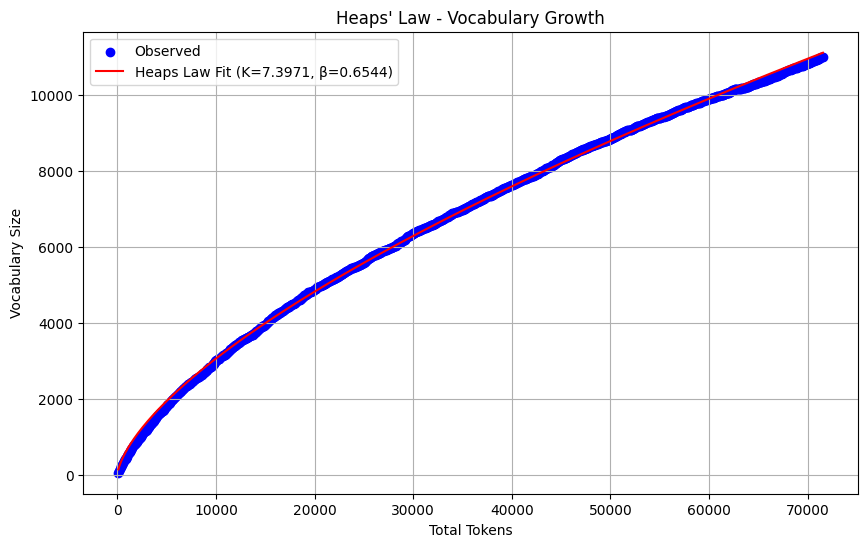

In [6]:
import pandas as pd
import re
from collections import Counter
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Load the CSV file
file_path = "C:\\Users\\yashp\\Downloads\\first_1000_records.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

# Tokenizer function to split text into words
def tokenize(text):
    if isinstance(text, str):  # Ensure the input is a valid string
        text = re.sub(r'\W+', ' ', text.lower())  # Remove non-alphanumeric characters and lowercase
        return text.split()
    return []  # Return an empty list if the input is not a string

# Initialize counters for tokens and vocabulary
total_tokens = 0
vocabulary = set()
vocab_size = []
token_counts = []

# Process each passage in the dataset, skipping NaN or missing values
for passage in df['passage_text'].dropna():
    tokens = tokenize(passage)
    total_tokens += len(tokens)
    vocabulary.update(tokens)  # Update vocabulary set with new tokens
    vocab_size.append(len(vocabulary))  # Store current vocabulary size
    token_counts.append(total_tokens)  # Store current total token count

# Heaps' Law function: V(n) = K * n^beta
def heaps_law(n, K, beta):
    return K * n**beta

# Fit Heaps' Law curve to the data
params, _ = curve_fit(heaps_law, token_counts, vocab_size)

# Extract K and beta from fitted parameters
K, beta = params

# Display the results
print(f"Heaps' Law parameters: K = {K:.4f}, beta = {beta:.4f}")

# Plot the observed vs predicted vocabulary growth
plt.figure(figsize=(10, 6))
plt.scatter(token_counts, vocab_size, label='Observed', color='blue')
plt.plot(token_counts, heaps_law(np.array(token_counts), K, beta), label=f'Heaps Law Fit (K={K:.4f}, β={beta:.4f})', color='red')
plt.xlabel('Total Tokens')
plt.ylabel('Vocabulary Size')
plt.title('Heaps\' Law - Vocabulary Growth')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
import pandas as pd
import re
from collections import defaultdict
from functools import reduce

# Load the CSV file
file_path = "C:\\Users\\yashp\\Downloads\\first_1000_records.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

# Tokenizer function to split text into words
def tokenize(text):
    if isinstance(text, str):  # Ensure the input is a valid string
        text = re.sub(r'\W+', ' ', text.lower())  # Remove non-alphanumeric characters and lowercase
        return text.split()
    return []  # Return an empty list if the input is not a string

# Map function: takes a passage and outputs a list of (word, 1) pairs
def map_function(passage):
    tokens = tokenize(passage)
    return [(token, 1) for token in tokens]

# Reduce function: aggregates word counts
def reduce_function(accumulator, current):
    word, count = current
    accumulator[word] += count
    return accumulator

# Initialize a list to hold all (word, 1) pairs
mapped = []

# Apply the Map phase
for passage in df['passage_text'].dropna():
    mapped.extend(map_function(passage))

# Apply the Reduce phase: Use reduce to aggregate the counts
word_count = reduce(reduce_function, mapped, defaultdict(int))

# Convert the word_count dictionary to a DataFrame for better readability
word_count_df = pd.DataFrame(list(word_count.items()), columns=['Word', 'Count'])

# Sort by count in descending order and display the top results
word_count_df = word_count_df.sort_values(by='Count', ascending=False)

# Display top 10 most frequent words
print(word_count_df.head(10))


    Word  Count
22   the   4248
11    of   2271
8      a   1969
13   and   1861
7     is   1639
20    to   1616
68    in   1418
44   for    742
55    or    669
174  are    570


In [8]:
import pandas as pd
import re
from collections import Counter
import heapq

# Load the dataset
file_path ='C:\\Users\\yashp\\Downloads\\first_1000_records.csv'
df = pd.read_csv(file_path)

# Function to tokenize and clean the text
def tokenize(text):
    # Remove non-alphanumeric characters and convert to lowercase
    text = re.sub(r'\W+', ' ', text.lower())
    return text.split()

# Step 1: Count word frequencies
word_counter = Counter()

# Process each passage in the dataset
for passage in df['passage_text'].dropna():  # Drop NaN values
    tokens = tokenize(passage)
    word_counter.update(tokens)  # Update word counts

# Prepare sorted lists of frequencies
sorted_word_freq = sorted(word_counter.items(), key=lambda x: x[1], reverse=True)

# For demonstration, we can create separate lists for each frequency count
sorted_lists = [[(word, count)] for word, count in sorted_word_freq]

# Step 2: Logarithmic Merge
def logarithmic_merge(sorted_lists):
    min_heap = []
    
    # Add the first element of each list to the heap
    for i, lst in enumerate(sorted_lists):
        if lst:  # check if the list is not empty
            heapq.heappush(min_heap, (lst[0][1], i, 0))  # (count, list_index, element_index)
    
    merged_list = []
    
    while min_heap:
        # Get the smallest count from the heap
        count, list_index, element_index = heapq.heappop(min_heap)
        merged_list.append((sorted_lists[list_index][element_index][0], count))
        
        # If there is another element in the same list, add it to the heap
        if element_index + 1 < len(sorted_lists[list_index]):
            next_count = sorted_lists[list_index][element_index + 1][1]
            heapq.heappush(min_heap, (next_count, list_index, element_index + 1))
    
    return merged_list

# Perform the logarithmic merge
merged_word_freq = logarithmic_merge(sorted_lists)

# Output the results
for word, count in merged_word_freq:
    print(f"{count:<5} {word}")  # Print in a formatted manner


1     disciplined
1     communities
1     youth
1     leaders
1     voter
1     northerner
1     defected
1     election
1     voters
1     disillusioned
1     malaise
1     1970s
1     jimmy
1     gerald
1     sights
1     surrounds
1     parkland
1     concord
1     trains
1     shower
1     insulate
1     fiberglass
1     explained
1     importantly
1     factitious
1     malingering
1     intentional
1     conscious
1     stethoscope
1     complexity
1     domestically
1     drawings
1     inventions
1     provisional
1     intricacies
1     cartwright
1     theatres
1     playwrights
1     aeschylus
1     sophocles
1     euripides
1     premiere
1     imitated
1     pantomime
1     drew
1     inspiration
1     presentation
1     distinctive
1     gymnosperms
1     solvents
1     needle
1     somatic
1     ________
1     telophase
1     makeup
1     chromatid
1     chromatids
1     featuring
1     anthropomorphic
1     mischievous
1     wearing
1     beginner
1     inaugurated
1   

In [13]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset from the given path
dataset_path = 'C:\\Users\\yashp\\Downloads\\first_1000_records.csv'
df = pd.read_csv(dataset_path)

# Tokenization function to clean and split text
def tokenize(text):
    if isinstance(text, str):
        text = re.sub(r'\W+', ' ', text.lower())  # Remove non-alphanumeric characters and lowercase
        return text.split()
    return []

# Dictionary compression function - create a compressed dictionary of terms
def compress_dictionary(tokens):
    dictionary = {}  # Store the term with unique ids
    compressed_tokens = []  # Store the compressed tokens as ids
    current_id = 0
    for token in tokens:
        if token not in dictionary:
            dictionary[token] = current_id  # Assign a new id to the token
            current_id += 1
        compressed_tokens.append(dictionary[token])  # Store the token's id
    return compressed_tokens, dictionary

# Combine all queries and passage text for TF-IDF and cosine similarity
queries = df['query'].astype(str).tolist()
passages = df['passage_text'].astype(str).tolist()

# Tokenize the queries and passages
tokenized_queries = [' '.join(tokenize(query)) for query in queries]
tokenized_passages = [' '.join(tokenize(passage)) for passage in passages]

# Compress the tokenized text (for dictionary compression) 
all_tokens = ' '.join(tokenized_queries + tokenized_passages).split()
compressed_tokens, term_dictionary = compress_dictionary(all_tokens)

# Display the compressed dictionary
print("Compressed Dictionary (first 10 terms):", dict(list(term_dictionary.items())[:10]))

# Apply TF-IDF on the compressed text
vectorizer = TfidfVectorizer()
combined_data = tokenized_queries + tokenized_passages
tfidf_matrix = vectorizer.fit_transform(combined_data)

# Split the TF-IDF matrix into query and passage sections
query_tfidf = tfidf_matrix[:len(queries)]
passage_tfidf = tfidf_matrix[len(queries):]

# Calculate cosine similarity between the queries and passages
cosine_sim_matrix = cosine_similarity(query_tfidf, passage_tfidf)

# Display cosine similarity for each query with the first passage as an example
for i, query in enumerate(queries):
    print(f"Cosine similarity of query '{query}' with the first passage:", cosine_sim_matrix[i, 0])

# Print all compressed tokens
print("All compressed tokens:", compressed_tokens)


Compressed Dictionary (first 10 terms): {'what': 0, 'is': 1, 'rba': 2, 'was': 3, 'ronald': 4, 'reagan': 5, 'a': 6, 'democrat': 7, 'how': 8, 'long': 9}
Cosine similarity of query 'what is rba' with the first passage: 0.3388784570993992
Cosine similarity of query 'was ronald reagan a democrat' with the first passage: 0.0
Cosine similarity of query 'how long do you need for sydney and surrounding areas' with the first passage: 0.03350400597441112
Cosine similarity of query 'price to install tile in shower' with the first passage: 0.012847723561009834
Cosine similarity of query 'why conversion observed in body' with the first passage: 0.0
Cosine similarity of query 'where are the lungs located in the back' with the first passage: 0.029285458740107875
Cosine similarity of query 'cost to get a patent' with the first passage: 0.017784240004599286
Cosine similarity of query 'what does a metabolic acidosis need to reverse the condition' with the first passage: 0.020467902729477655
Cosine simila

In [12]:
import re
import pandas as pd

# Function to tokenize text
def tokenize(text):
    text = re.sub(r'\W+', ' ', str(text).lower())  # Normalize the text
    return text.split()

# Front coding compression function
def front_coding(sorted_terms):
    if not sorted_terms:
        return []

    compressed_list = []
    common_prefix = sorted_terms[0]  # Start with the first word
    compressed_list.append(common_prefix)

    for i in range(1, len(sorted_terms)):
        word = sorted_terms[i]
        # Find the common prefix with the previous word
        prefix_length = 0
        while (prefix_length < len(common_prefix) and 
               prefix_length < len(word) and 
               common_prefix[prefix_length] == word[prefix_length]):
            prefix_length += 1

        # Store the prefix and the suffix of the new word
        compressed_word = f"{prefix_length}*{word[prefix_length:]}"
        compressed_list.append(compressed_word)
        common_prefix = word  # Update the common prefix

    return compressed_list

# Load your dataset (make sure to update the correct path to your dataset)
df = pd.read_csv('C:\\Users\\yashp\\Downloads\\first_1000_records.csv')

# Extract the text and tokenize
all_words = []
for passage in df['passage_text']:
    tokens = tokenize(passage)
    all_words.extend(tokens)

# Sort the words for front coding
all_words = sorted(set(all_words))  # Remove duplicates and sort

# Apply front coding
compressed_terms = front_coding(all_words)

# Print all compressed tokens
for token in compressed_terms:
    print(token)


0
1*0
2*0
2*2
1*13
3*25
2*6
1*2
2*2
2*5
1*36
1*4
2*2
2*5
2*6
1*5
2*0
2*8
1*6
1*7
2*0
2*4
1*8
2*0
2*9
1*90
0*1
1*0
2*0
3*0
3*x100
2*1
2*2
2*3
2*5
3*0
2*70
2*8
2*cm
2*th
1*1
2*0
2*1
2*2
2*5
2*6
2*7
2*9
3*0
2*th
1*2
2*0
3*0
2*1
2*5
2*8
2*9
3*9
2*h
2*l
2*th
2*w
3*l
2*x12
1*3
2*0
3*0
2*1
2*2
2*3
2*5
2*9
2*th
1*4
2*0
3*0
4*s
2*3
2*5
2*6
2*th
1*5
2*0
3*0
4*s
3*th
3*ºc
2*2nd
2*4
2*5
2*61
2*87
2*th
1*6
2*0
3*0
4*s
2*3
2*5
2*66
2*7
3*77216
2*9
2*gb
2*th
1*7
2*0
2*1
2*3
2*5
3*0
2*6
3*5
2*7
3*3
3*4
2*89
2*91
3*8
2*th
1*8
2*0
3*0
3*3
3*9
3*c
2*1
3*7
2*29
2*3
3*0
3*1
3*3
3*6
3*7
2*42
3*8
2*5
3*2
2*62
3*3
3*5
3*6
2*74
3*5
3*6
3*9
2*80
3*6
3*7
3*9
2*90s
3*1
3*9
2*th
1*9
2*0
3*1
3*4
3*6
3*7
3*8
3*9
2*10s
3*1
3*2
3*3
3*4
3*6
2*20
4*s
3*3
3*5
3*6
3*7
3*9
2*3
3*0
4*s
3*8
3*9
2*4
3*2
3*3
3*6
3*7
3*8
2*5
3*0
3*1
3*4
3*9
2*62
3*7
3*8
3*9
2*70
4*s
3*1
3*2
3*3
3*5
3*6
3*7
2*80
4*s
3*1
3*3
3*4
3*6
3*7
3*8
3*9
2*9
3*0
4*s
3*1
3*2
3*3
3*4
3*5
3*6
3*9
2*th
1*b
1*k
1*o
1*st
0*2
1*0
2*0
3*0
4*s
3*1
3*2
3*3
3*4
3*6
3